# Lab 4

Sierra Wilde

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import random

In [42]:
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (20, 15)

## Problem 1

### 1.

In [3]:
#importing the gamma ray dataset
hf = h5py.File('gammaray_lab4.h5', 'r')

In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

In [243]:
data = np.array(hf.get('data'))

In [6]:
data_table = pd.DataFrame(data).T
data_table.columns = ['Time (gps)', 'Solar Phase(deg)', 'Earth Longitude(deg)', 'Particle Counts']

Dataset of the number of gamma rays detected in a 100ms time period during a  25920001s time interval.

In [7]:
data_table

,Time (gps),Solar Phase(deg),Earth Longitude(deg),Particle Counts
0,940680016.0,315.000000,45.000000,10.0
1,940680016.1,315.007112,45.006667,8.0
2,940680016.2,315.014225,45.013333,7.0
3,940680016.3,315.021337,45.020000,11.0
4,940680016.4,315.028449,45.026667,8.0
5,940680016.5,315.035561,45.033333,11.0
6,940680016.6,315.042674,45.040000,5.0
7,940680016.7,315.049786,45.046667,10.0
8,940680016.8,315.056898,45.053333,9.0
9,940680016.9,315.064011,45.060000,8.0


Below is a histogram of the number of gamma ray counts over the entire measurement period.

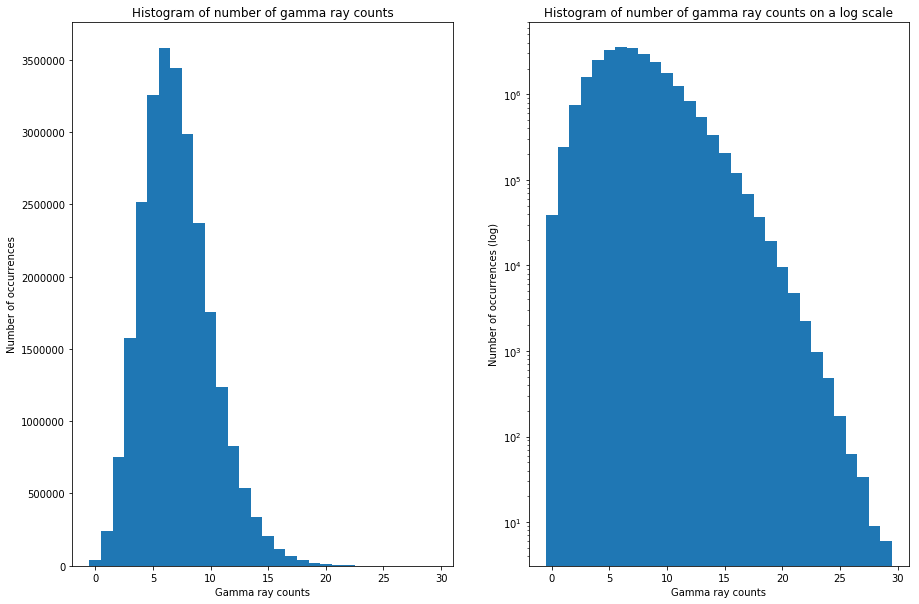

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].set_title('Histogram of number of gamma ray counts')
ax[0].hist(data_table['Particle Counts'], bins=np.arange(0, data_table['Particle Counts'].max()+1), align='left')
ax[0].set_xlabel('Gamma ray counts')
ax[0].set_ylabel('Number of occurrences')
ax[1].set_title('Histogram of number of gamma ray counts on a log scale')
ax[1].hist(data_table['Particle Counts'], bins=np.arange(0, data_table['Particle Counts'].max()+1), align='left')
ax[1].set_xlabel('Gamma ray counts')
ax[1].set_ylabel('Number of occurrences (log)')
ax[1].set_yscale('log')
plt.show()

The overall gamma ray count distribution appears to follow a Possion distribtution which is described by:

$P(k) = \frac{\lambda^ke^{-\lambda}}{k!}$, where $\lambda$ is the expected number of counts in the time interval, and k is the observed number of counts.

In [189]:
print('The mean number of gamma ray counts from this dataset is {}'.format(np.mean(data_table['Particle Counts'])))

The mean number of gamma ray counts from this dataset is 7.09730524315952


It makes sense that this follows Poisson distribution, because it is a discrete distribution, and it describes the probability of counting events. From this single plot, the data does not appear to be contaminated. Future analysis will prove against this, however. This is strong evidence for always looking at different plots.

Here the data is averaged over every 100s interval. This will allow us to look over the entire time period without being too computationally taxing.

In [22]:
#average particle count every 100s
avg_100s_int = []
for i in np.arange(0, (len(data_table['Time (gps)'])-1)/1000):
    p = np.asarray(data_table['Particle Counts'])[int(1000*i):int(1000*(i+1))].sum()/1000
    avg_100s_int.extend([p])

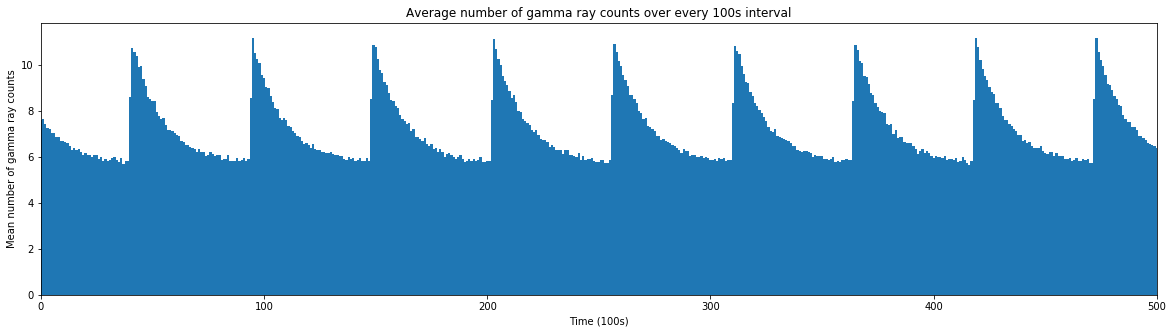

In [191]:
plt.figure(figsize=(20,5))
plt.title('Average number of gamma ray counts over every 100s interval')
plt.bar(np.arange(0, 25920), np.array(avg_100s_int), width=1)
plt.xlabel('Time (100s)')
plt.ylabel('Mean number of gamma ray counts')
plt.xlim(0, 500)
plt.show()

The background appears contaminated here because it is not constant as time goes on. The mean number of gamma ray counts follows some periodic function that, from inspection, appears to be an exponential decay. This means that the probability of number of counts changes over time, and thus a single probability distribtution would not fit the background well.

### 2.

In order to learn more about how the background changes, similar plots are made for the solar phase angle and the Earth longitudinal angle. They are both averaged over 100s intervals and plotted against time.

In [30]:
#average solar phase angle every 100s
solaravg_100s_int = []
for i in np.arange(0, (len(data_table['Time (gps)'])-1)/1000):
    p = np.asarray(data_table['Solar Phase(deg)'])[int(1000*i):int(1000*(i+1))].sum()/1000
    solaravg_100s_int.extend([p])

In [26]:
#average earth longitude angle every 100s
long_100s_int = []
for i in np.arange(0, (len(data_table['Time (gps)'])-1)/1000):
    p = np.asarray(data_table['Earth Longitude(deg)'])[int(1000*i):int(1000*(i+1))].sum()/1000
    long_100s_int.extend([p])

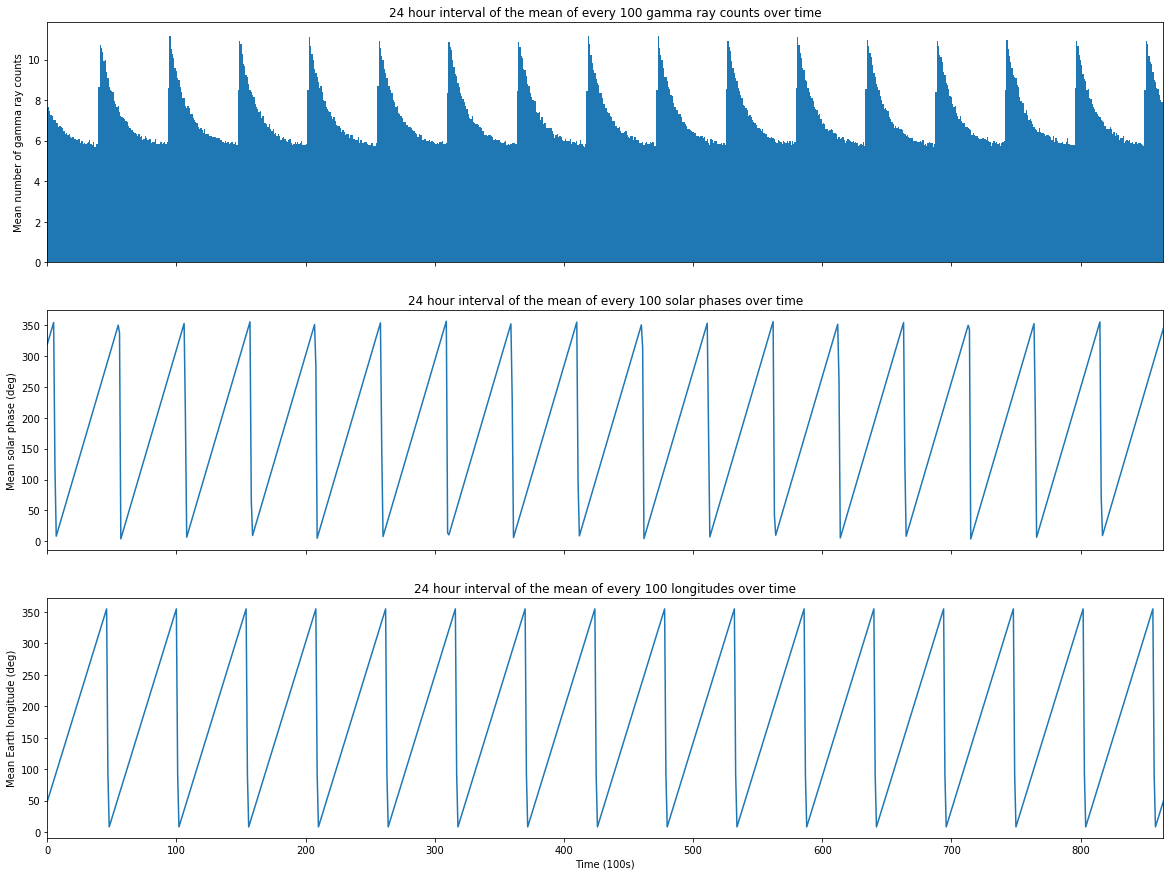

In [43]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15), sharex=True)
ax[0].set_title('24 hour interval of the mean of every 100 gamma ray counts over time')
ax[0].bar(np.arange(0, 25920), np.array(avg_100s_int), width=1)
ax[0].set_ylabel('Mean number of gamma ray counts')
ax[1].set_title('24 hour interval of the mean of every 100 solar phases over time')
ax[1].plot(np.arange(0, 25920), np.array(solaravg_100s_int))
ax[1].set_ylabel('Mean solar phase (deg)')
ax[2].set_title('24 hour interval of the mean of every 100 longitudes over time')
ax[2].plot(np.arange(0, 25920), np.array(long_100s_int))
ax[2].set_xlim(0, 864)
ax[2].set_ylabel('Mean Earth longitude (deg)')
ax[2].set_xlabel('Time (100s)')
plt.show()

Here are the plots of gamma ray counts, solar phase angle, and Earth longitude angle against time. The peaks of the longitude and the number of gamma ray counts seem to line up fairly well. All of the periods of the cycles are around the 5400 second, or 90 minute mark. This makes sense because the satellite has an oribital period of 90 minutes.

### 3.

The model for the background is already created above, where the number of counts are averaged in 100 second intervals. This creates a probability distribtution at different times, based on the time dependence of the background. This therefore has a resolution of every 100s, and thus multiple datapoints that are slowly changing get lumped together into one distribution, however this effect is small based on a 5400s period. The data in this relatively little of a time span can be treated as time-dependent.

Below is a fit of the average number of counts over one period. The distribution looked exponential at first, but was found to be described by a different distribution more accurately.

In [57]:
#finding the maximum value in the first full period of the data
max_count = np.asarray(avg_100s_int[30:70]).max()
print(max_count)

10.736


In [65]:
#finding the time, or index, to where that value corresponds
max_count_index = np.where(np.asarray(avg_100s_int) == max_count)[0][0]
print(max_count_index)

41


In [59]:
#finding the minimum value in the first full period of the data
min_count = np.asarray(avg_100s_int[41:100]).min()
print(min_count)

5.828


In [66]:
#finding the time, or index, to where the minimum value corresponds
min_count_index = np.where(np.asarray(avg_100s_int) == min_count)[0][0]
print(min_count_index)

89


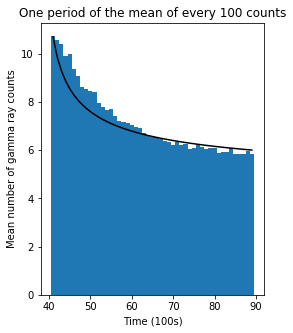

In [187]:
t = np.arange(41, 90)
a = np.log(5.828/10.736) / (41 - 89)

plt.figure(figsize=(4, 5))
plt.title('One period of the mean of every 100 counts')
plt.xlabel('Time (100s)')
plt.ylabel('Mean number of gamma ray counts')
plt.bar(t, np.array(avg_100s_int)[41:90], width=1)
plt.plot(t, np.array(avg_100s_int)[41:90][0]/(np.sqrt(t-38))+4.5, c='k')
plt.show()

The model above that fits the distribtution of averaged gamma counts over time goes as $\frac{1}{\sqrt{t}}$, with the full equation being:

$\lambda(t) = \frac{\lambda_o}{\sqrt{t-38}}+4.5$, where $\lambda_o$ is the peak value, which in this case is 10.736.

### 4.

Each time will have a different significance threshold, because the average number of counts changes over tiem. It will be helpful to see how the threshold changes over time. In order to test a few different 100-millisecond thresholds, 1000 different times, expressed as index numbers, are randomly generated.

In [233]:
#use a random integer generator to get 1000 different indices
time_list = random.sample(range(0, 25920000), 1000)
print(time_list)

[12721277, 17291584, 18021221, 21657345, 15573603, 19175045, 11720818, 19320056, 14627553, 1214841, 15212483, 4963165, 22547879, 3577670, 5633230, 10582273, 15793594, 12574430, 23281637, 20435860, 7867970, 8117476, 7217774, 23751772, 17876128, 285297, 9441303, 9857415, 10254408, 20969044, 7624770, 23683329, 10971665, 20536029, 5327624, 9291135, 23908683, 19977448, 14214010, 12868692, 6373206, 16875267, 4534581, 2458726, 24123146, 6667396, 6490713, 7868829, 19357250, 14310311, 1249785, 9610791, 23854136, 24592334, 23155153, 8740012, 13717338, 6018835, 20691785, 8781066, 22991888, 19455638, 24166651, 23089948, 8237984, 19828208, 16829604, 2205677, 20430905, 23181407, 1314951, 23246492, 12851824, 15154671, 17434638, 10522633, 3210612, 16235336, 11527814, 18055370, 19260105, 25524206, 23236600, 13425840, 8171787, 15965382, 1654571, 8150950, 9262428, 185453, 24555056, 4910149, 7071670, 11649157, 10890507, 3657797, 15040358, 13097480, 2892466, 18328600, 24758829, 1359556, 21316975, 4233098, 

The significance of a detection against the Poisson gamma ray background distribution is determined by the probability to get that measurement and what that same probability corresponds to on the Gaussian probability distribution. The value needed in order to produce a 5$\sigma$ significance with a given mean $\lambda$ is:

$\sigma = 2 \cdot erf^{-1}(\int_x^{\infty}P(k)dk$, where $P(k)$ is the Poisson distribution, with a mean that changes in time as discussed above.

In [234]:
#finding the 5 sigma values of each time
time_list = np.sort(time_list)
five_sigma = []
for time in time_list:
    #find the distribution where each time lies
    k = data_table['Particle Counts'][time]
    mean = avg_100s_int[int(time/1000)]
    #prob = stats.poisson.cdf(k, mean)
    prob = stats.norm.sf(5)
    sigma = stats.poisson.isf(prob, mean)
    five_sigma.extend([sigma])
print(five_sigma)

[23.0, 27.0, 23.0, 22.0, 22.0, 22.0, 27.0, 23.0, 22.0, 31.0, 26.0, 25.0, 26.0, 23.0, 22.0, 25.0, 22.0, 25.0, 23.0, 21.0, 28.0, 27.0, 25.0, 24.0, 31.0, 24.0, 22.0, 21.0, 27.0, 22.0, 22.0, 22.0, 21.0, 23.0, 22.0, 22.0, 21.0, 22.0, 23.0, 22.0, 21.0, 22.0, 24.0, 22.0, 22.0, 21.0, 27.0, 25.0, 22.0, 22.0, 22.0, 22.0, 21.0, 23.0, 22.0, 22.0, 23.0, 22.0, 22.0, 23.0, 30.0, 22.0, 25.0, 31.0, 21.0, 23.0, 22.0, 21.0, 21.0, 31.0, 30.0, 27.0, 21.0, 23.0, 21.0, 25.0, 30.0, 28.0, 26.0, 26.0, 22.0, 26.0, 22.0, 28.0, 29.0, 22.0, 21.0, 22.0, 27.0, 23.0, 21.0, 22.0, 22.0, 22.0, 23.0, 25.0, 23.0, 23.0, 21.0, 22.0, 25.0, 22.0, 22.0, 31.0, 23.0, 22.0, 21.0, 23.0, 23.0, 22.0, 21.0, 23.0, 23.0, 23.0, 22.0, 22.0, 27.0, 30.0, 21.0, 22.0, 22.0, 22.0, 24.0, 23.0, 21.0, 27.0, 23.0, 22.0, 22.0, 21.0, 27.0, 26.0, 25.0, 23.0, 25.0, 23.0, 23.0, 22.0, 25.0, 21.0, 25.0, 22.0, 27.0, 22.0, 28.0, 22.0, 30.0, 25.0, 28.0, 27.0, 22.0, 22.0, 21.0, 31.0, 24.0, 23.0, 22.0, 27.0, 26.0, 23.0, 22.0, 22.0, 27.0, 26.0, 22.0, 22.0, 28.

In [239]:
print(np.asarray(five_sigma).min())
print(np.asarray(five_sigma).max())

21.0
31.0


Text(0, 0.5, 'Number of counts that correspond with a 5 sigma significance')

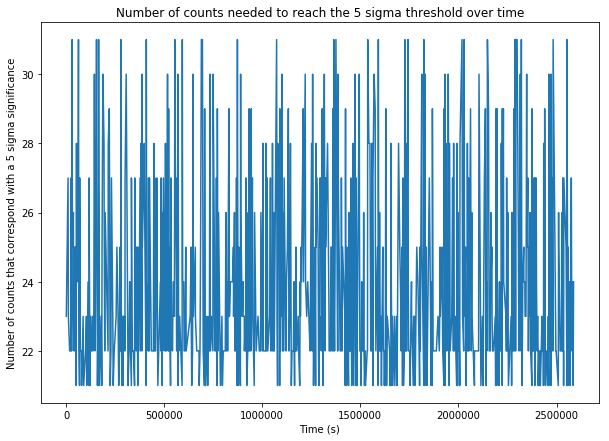

In [235]:
plt.figure(figsize = (10, 7))
plt.title('Number of counts needed to reach the 5 sigma threshold over time')
plt.plot(np.asarray(time_list)/10, five_sigma)
plt.xlabel('Time (s)')
plt.ylabel('Number of counts that correspond with a 5 sigma significance')

The number of counts from the sample of 1000 100-millisecond gamma ray backgrounds needed in order to be significant range from 21 to 31. As one would expect, given the time variance of the background, the 5$\sigma$ threshold varies in time as well. There is a greater probability of a high count rate during times when the background has a peak mean. This makes sense because the mean corresponds to the number of counts expected, and thus it is more likely to see a greater number of counts during these time intervals.

The cause of the variable background is most likely from a combination of the solar phase and the Earth longitude. Since the sun, Earth, and the moon all act as gamma ray sinks, their positions with respect to the satellite will change the number of gamma rays that it will be able to detect at given time.

## Problem 2

In [240]:
hf2 = h5py.File('images.h5', 'r')

In [241]:
hf2.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [250]:
data2 = np.array(hf.get('image1'))
data3 = np.array(hf.get('imagestack'))

In [262]:
image1 = np.array(hf2['image1']).astype('uint8')
imagestack = np.array(hf2['imagestack']).astype('uint8')

In [275]:
print(np.size(image1[0]))
print(np.size(imagestack[0]))

200
2000


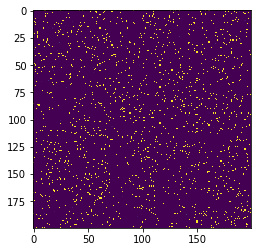

In [310]:
plt.figure()
plt.imshow(image1)

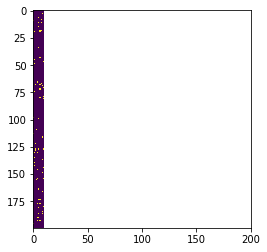

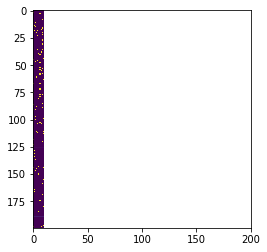

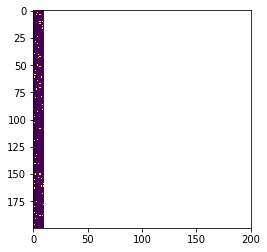

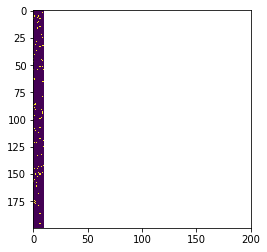

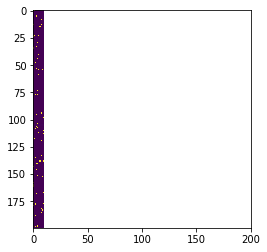

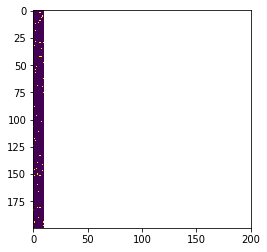

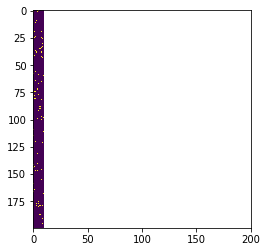

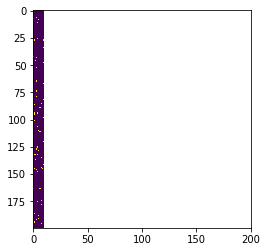

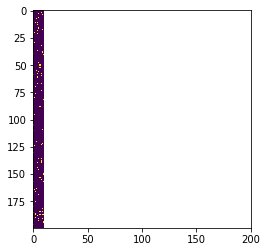

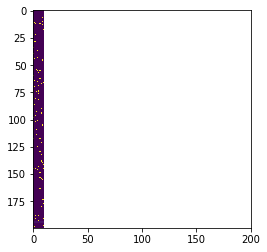

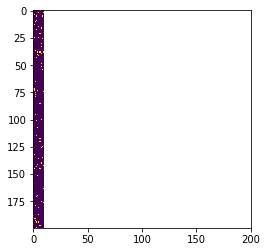

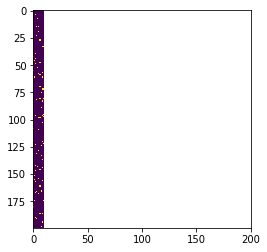

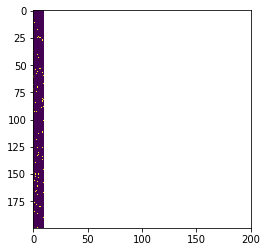

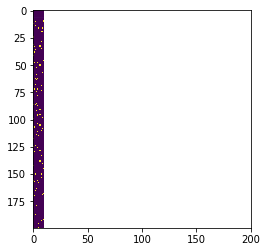

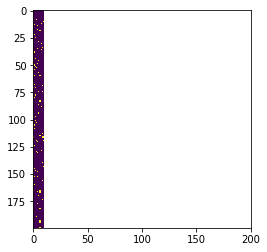

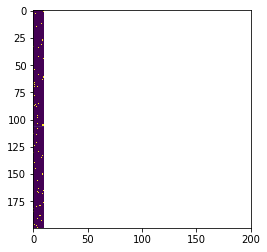

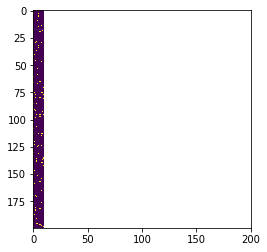

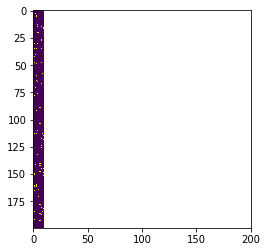

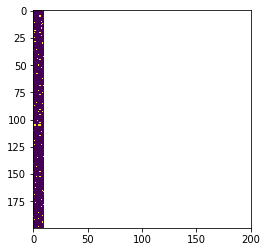

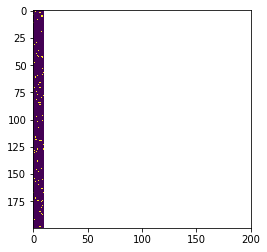

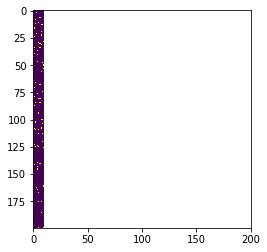

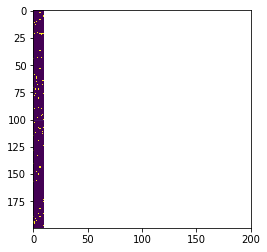

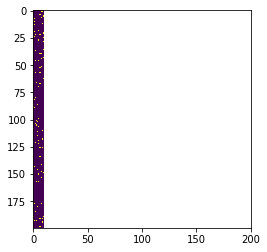

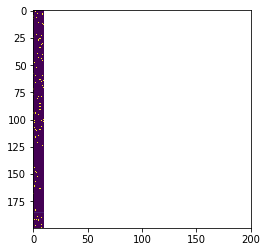

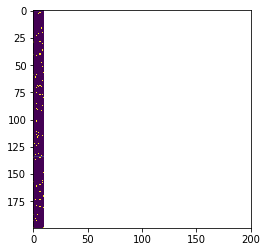

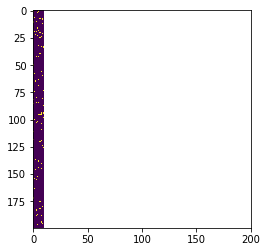

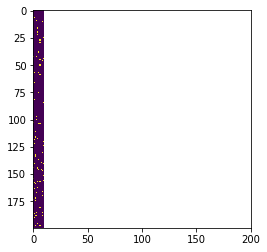

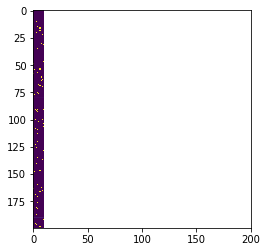

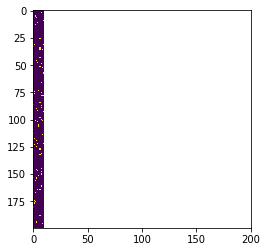

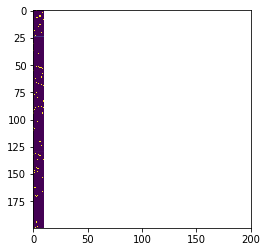

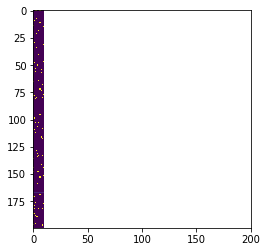

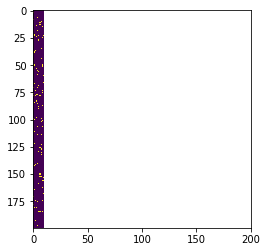

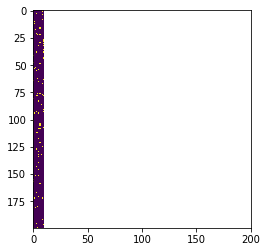

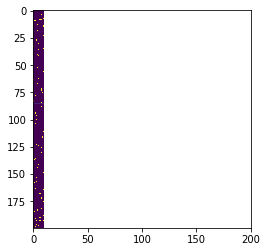

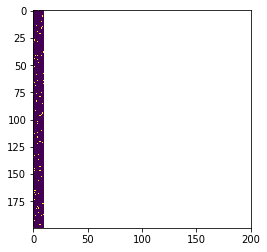

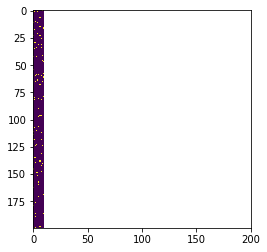

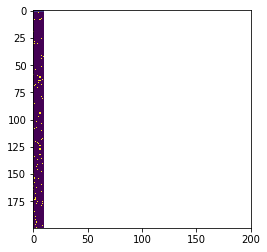

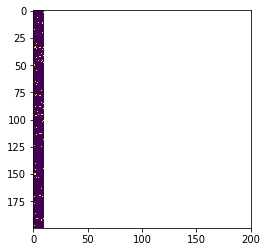

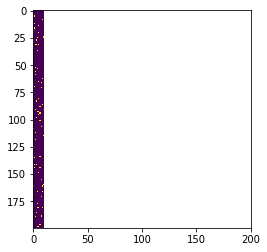

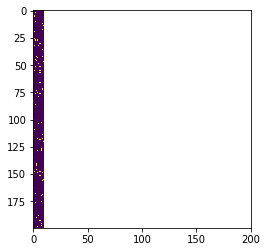

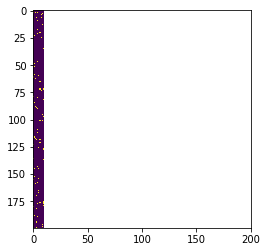

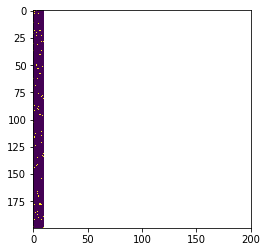

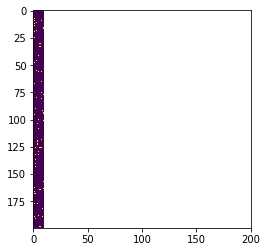

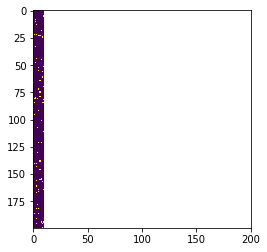

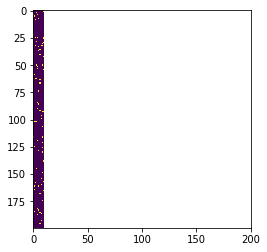

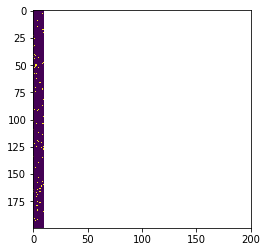

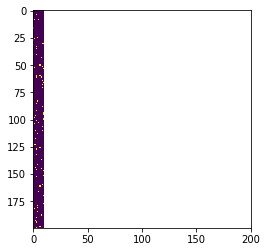

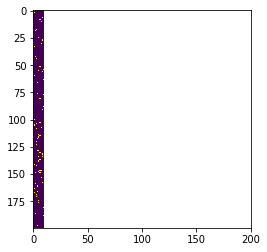

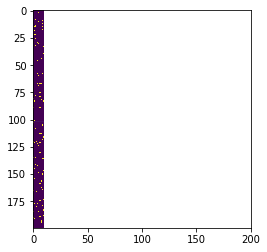

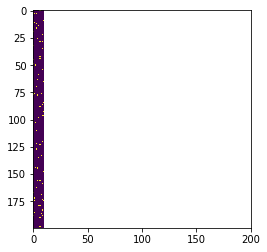

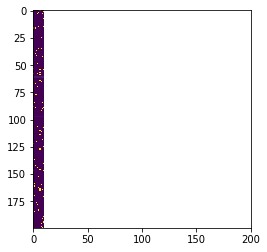

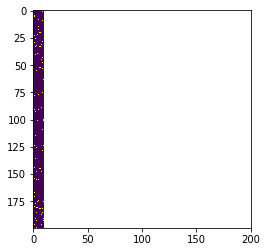

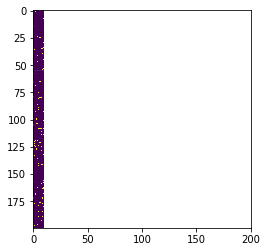

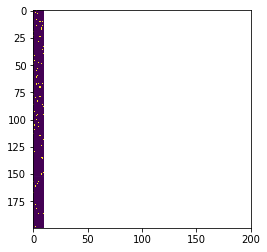

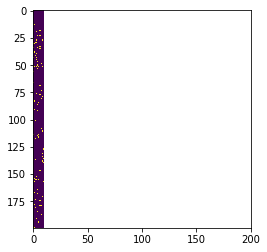

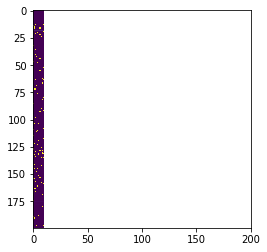

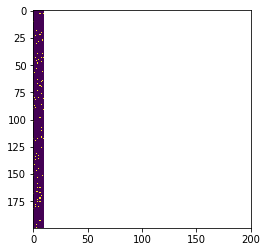

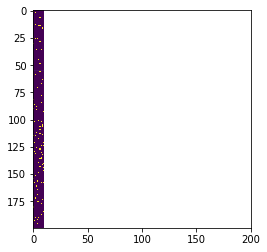

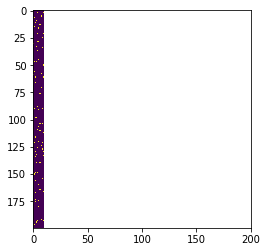

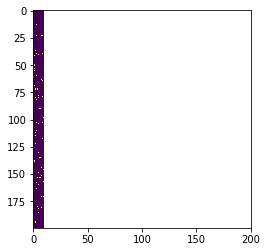

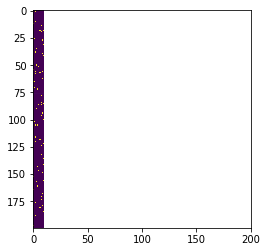

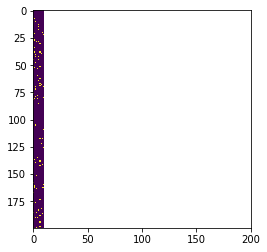

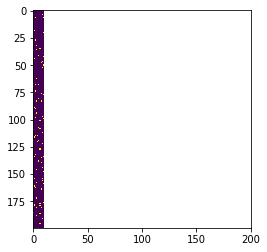

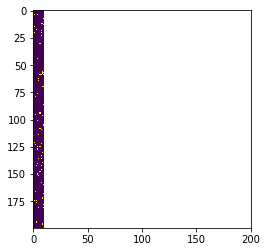

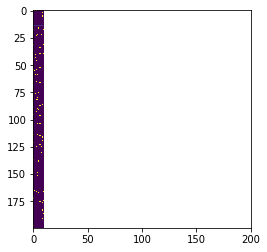

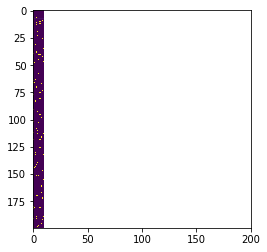

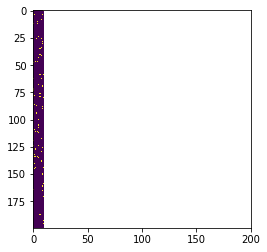

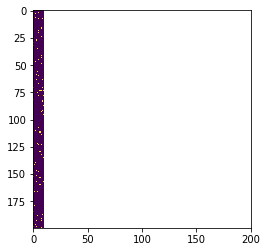

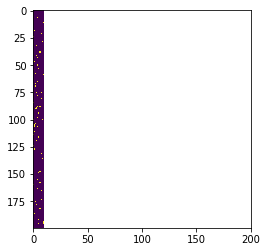

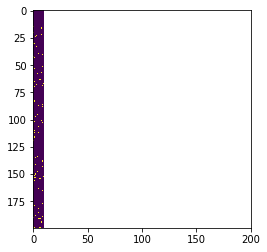

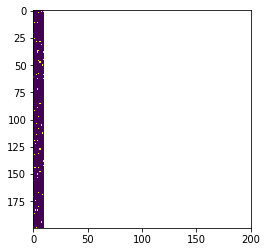

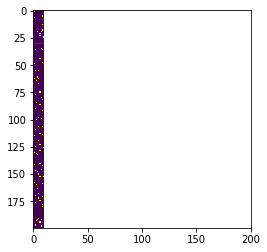

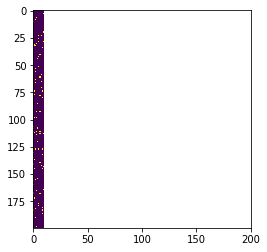

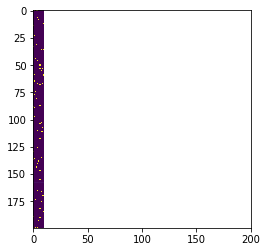

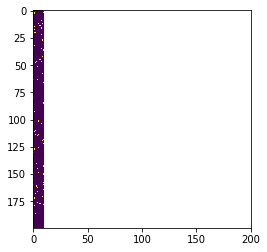

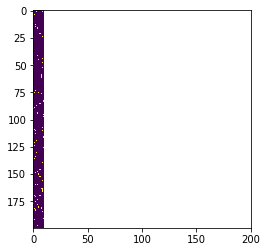

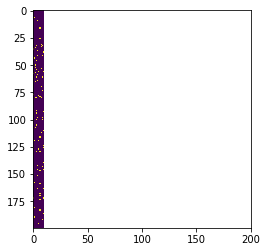

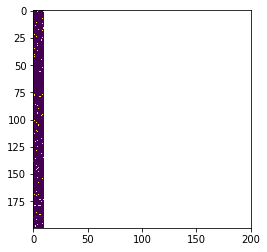

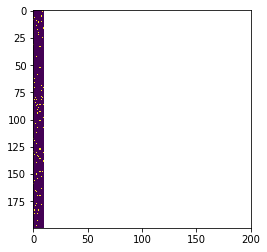

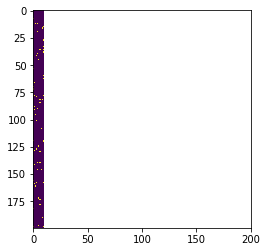

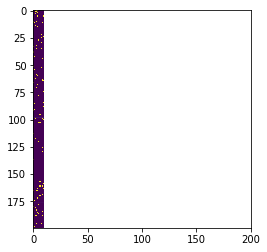

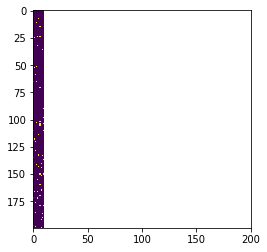

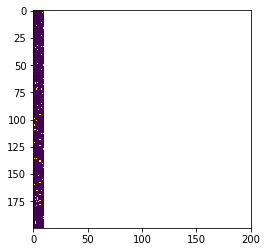

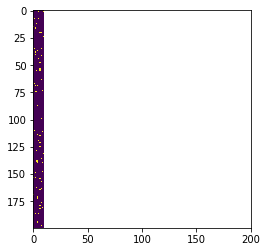

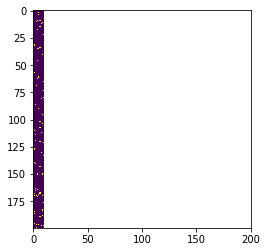

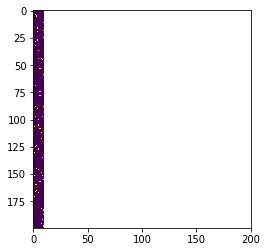

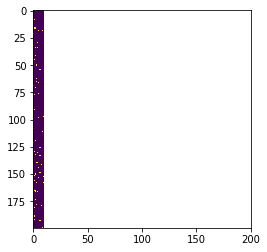

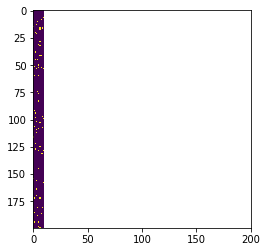

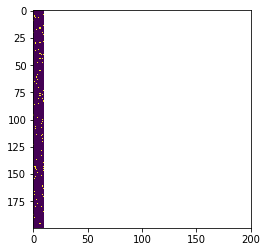

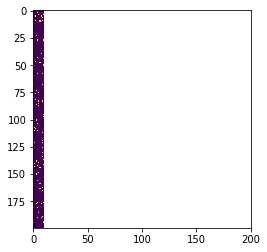

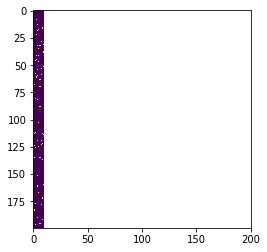

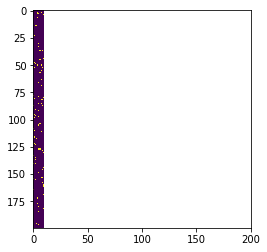

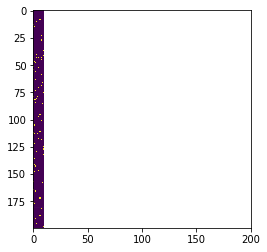

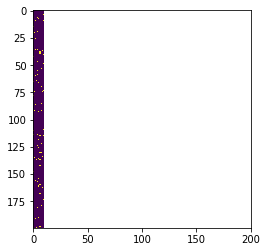

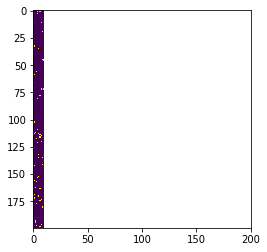

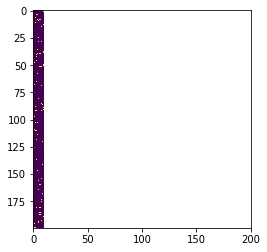

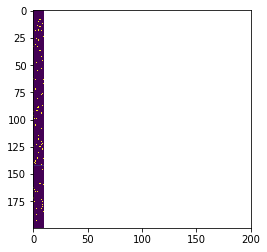

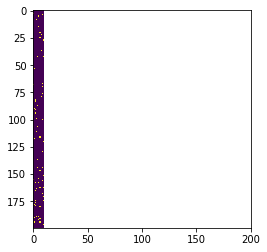

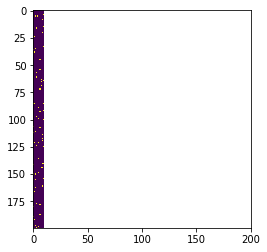

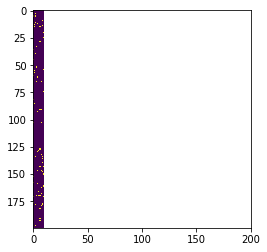

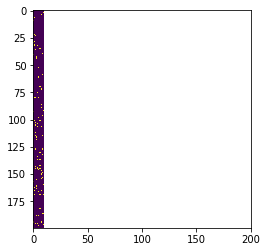

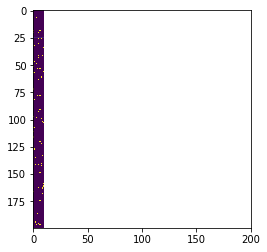

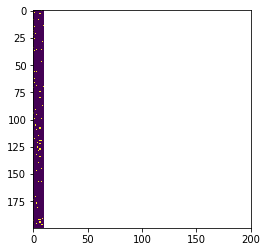

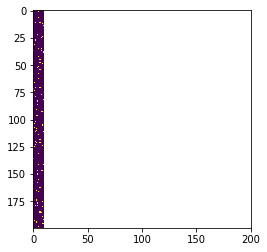

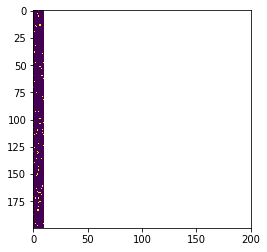

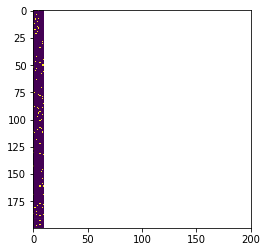

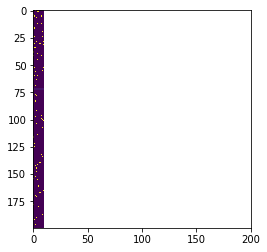

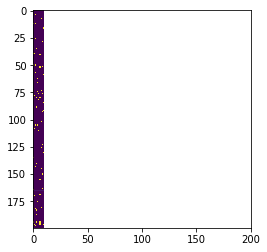

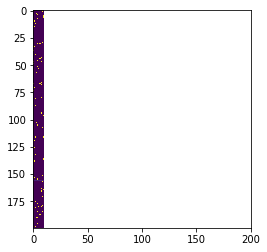

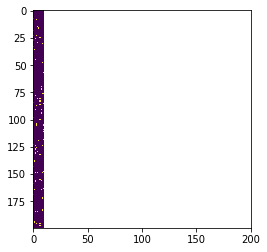

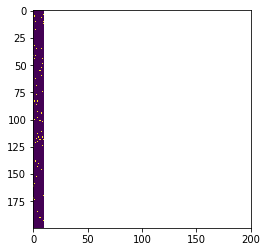

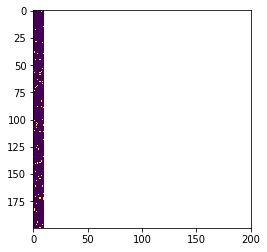

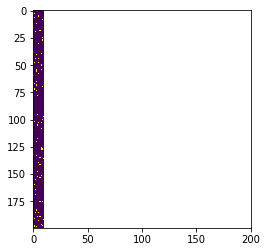

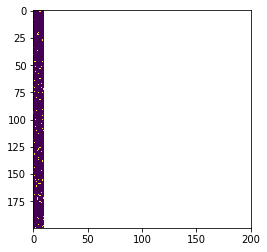

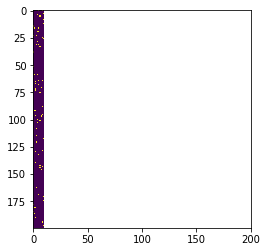

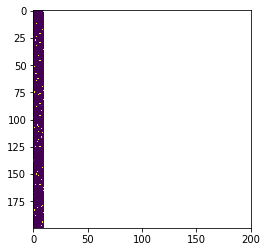

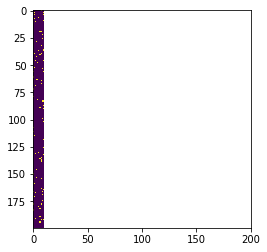

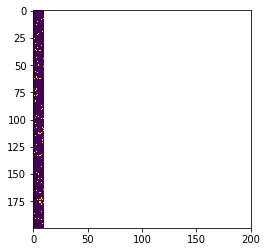

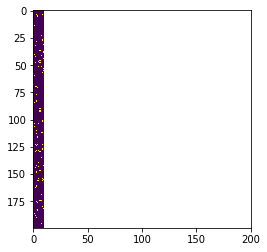

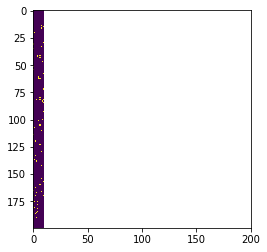

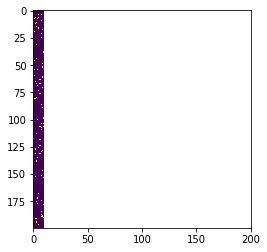

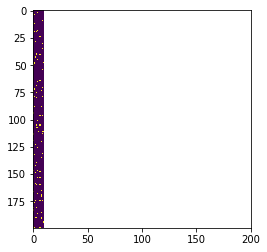

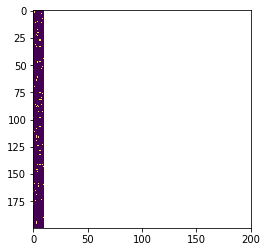

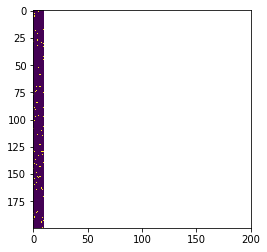

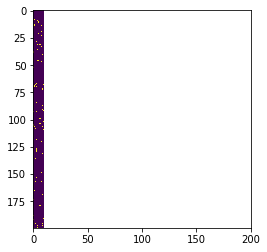

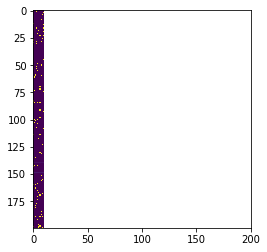

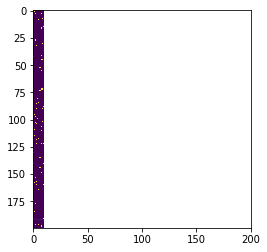

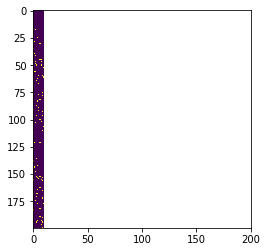

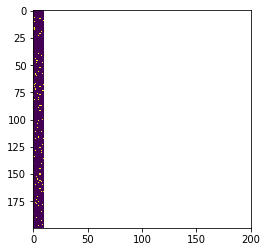

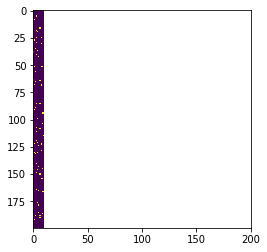

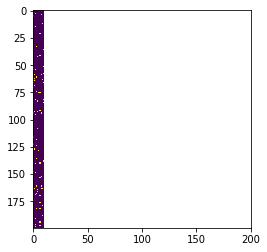

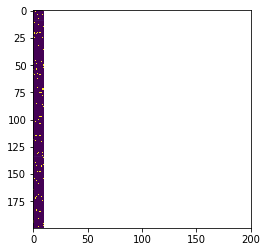

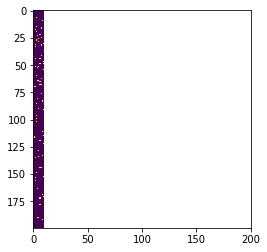

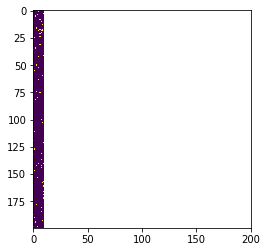

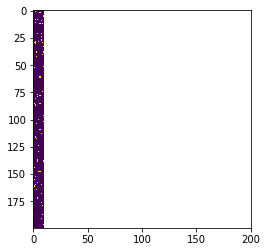

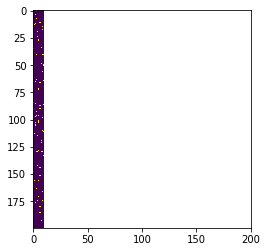

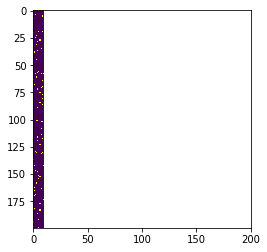

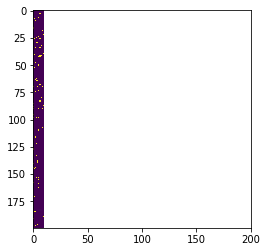

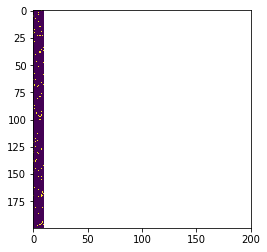

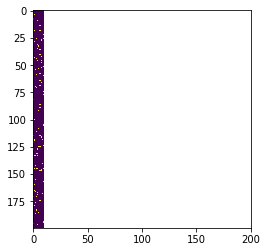

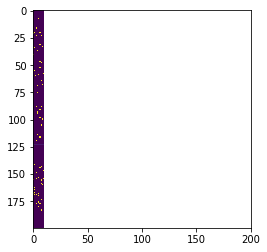

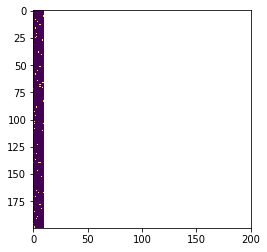

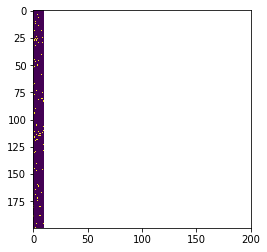

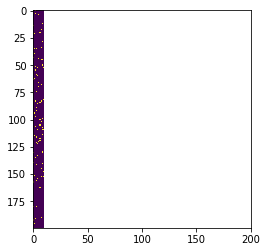

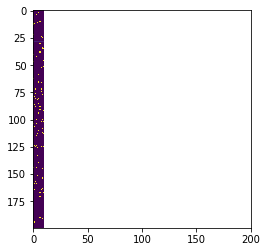

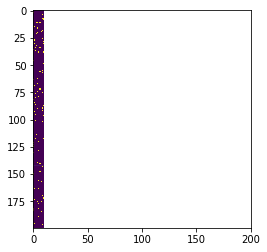

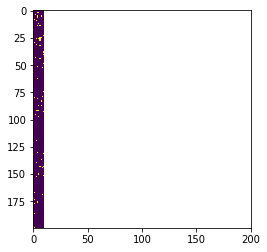

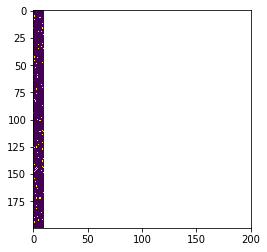

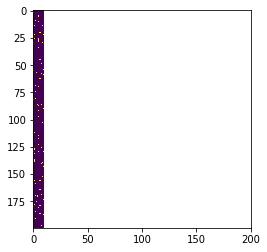

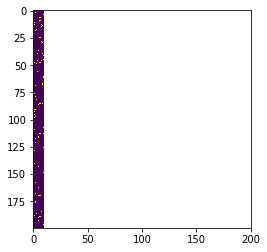

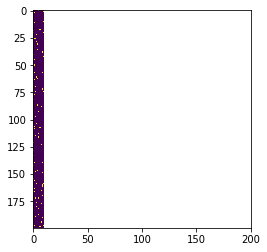

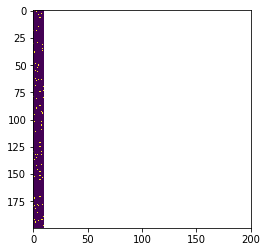

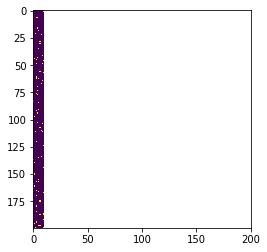

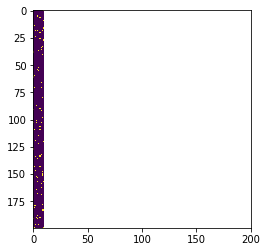

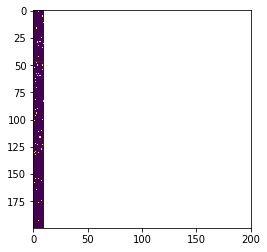

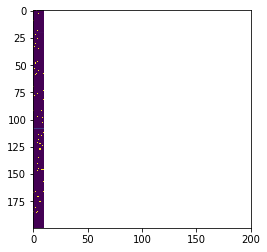

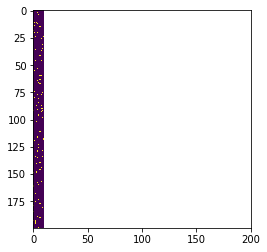

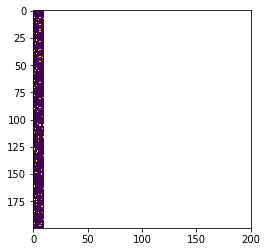

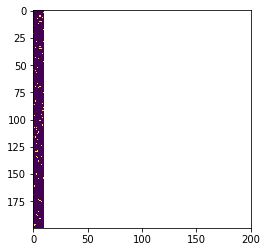

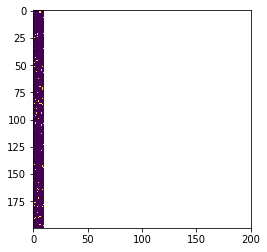

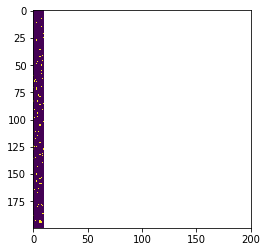

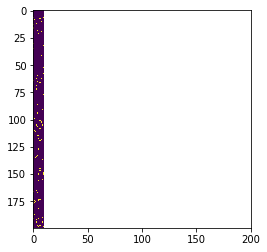

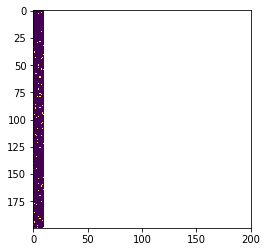

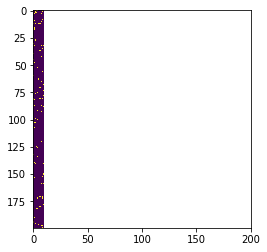

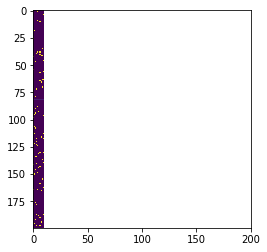

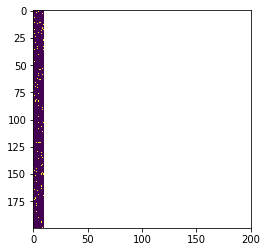

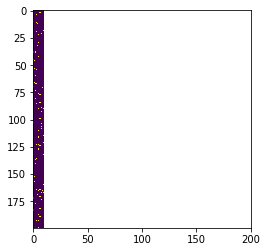

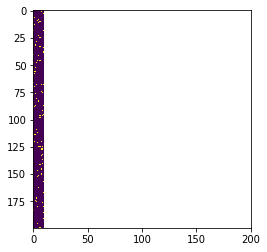

KeyboardInterrupt: 

In [288]:
for each in imagestack:
    

In [292]:
print(imagestack)

[[[  0   0   0 ...   0   1   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   1   0]
  [  0   0   0 ...   0   0   1]
  [255   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0 255]
  [255   0   0 ... 255   0   1]
  [  0   1   0 ...   0   0   0]]

 [[  0 255 255 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0 255   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   1   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   1   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   1   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ... 255   0  

In [293]:
print(len(imagestack[0]))

200


In [297]:
print(imagestack.flatten())

[0 0 0 ... 0 0 0]


C:\Users\shw24\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  """Entry point for launching an IPython kernel.


In [308]:
new_im = [each for each in imagestack]
new_imstack = np.concatenate(new_im, axis=1)

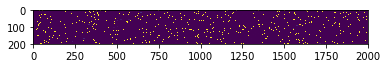

In [309]:
plt.figure()
plt.imshow(new_imstack)